In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [2]:
m1 = pd.read_csv("SalaryData.csv")

Uploaded the file

In [3]:
m1.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


Checked if it is uploaded correctly or not by checking the first 5 data.

In [4]:
m1.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


Checked the data set

In [5]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [12]:
m1['Education'].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

It gives exact number of frequency of different catagorical variables in 'Education'

In [13]:
m1['Occupation'].value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

It gives exact number of frequency of different catagorical variables in 'Occupation'

In [14]:
m1['Salary'].value_counts()

175935    1
162494    1
212448    1
219420    1
173935    1
90456     1
90135     1
149909    1
212781    1
220754    1
170769    1
160910    1
50122     1
167431    1
180934    1
75333     1
100135    1
83203     1
257345    1
160540    1
237920    1
95469     1
50103     1
191712    1
212760    1
173664    1
188729    1
235334    1
249207    1
260151    1
99185     1
248871    1
77743     1
153197    1
247724    1
100678    1
115945    1
248156    1
52242     1
133696    1
Name: Salary, dtype: int64

Checking the data points. Variable 'Salary' isn't the catagorical variable.

In [16]:
m1.Education = pd.Categorical(m1.Education)

Converting to categorical variable

In [17]:
m1.Education.value_counts

<bound method IndexOpsMixin.value_counts of 0      Doctorate
1      Doctorate
2      Doctorate
3      Doctorate
4      Doctorate
5      Doctorate
6      Doctorate
7      Doctorate
8      Doctorate
9      Doctorate
10     Doctorate
11     Doctorate
12     Doctorate
13     Doctorate
14     Doctorate
15     Bachelors
16     Bachelors
17     Bachelors
18     Bachelors
19     Bachelors
20     Bachelors
21     Bachelors
22     Bachelors
23     Bachelors
24     Bachelors
25     Bachelors
26       HS-grad
27       HS-grad
28       HS-grad
29       HS-grad
30       HS-grad
31       HS-grad
32       HS-grad
33       HS-grad
34       HS-grad
35     Bachelors
36     Bachelors
37     Bachelors
38     Bachelors
39     Doctorate
Name: Education, dtype: category
Categories (3, object): [Bachelors, Doctorate, HS-grad]>

#Main intention here is to check categories in 'Education'. Categories are Bachelors, Doctorate, HS-grad

In [34]:
m1.Occupation = pd.Categorical(m1.Occupation)

Converting to categorical variable

In [19]:
m1.Occupation.value_counts

<bound method IndexOpsMixin.value_counts of 0         Adm-clerical
1         Adm-clerical
2         Adm-clerical
3         Adm-clerical
4                Sales
5                Sales
6                Sales
7                Sales
8                Sales
9       Prof-specialty
10      Prof-specialty
11      Prof-specialty
12      Prof-specialty
13      Prof-specialty
14      Prof-specialty
15        Adm-clerical
16        Adm-clerical
17        Adm-clerical
18      Prof-specialty
19      Prof-specialty
20      Prof-specialty
21      Prof-specialty
22               Sales
23               Sales
24               Sales
25               Sales
26               Sales
27               Sales
28               Sales
29        Adm-clerical
30        Adm-clerical
31        Adm-clerical
32      Prof-specialty
33      Prof-specialty
34      Prof-specialty
35     Exec-managerial
36     Exec-managerial
37     Exec-managerial
38     Exec-managerial
39     Exec-managerial
Name: Occupation, dtype: category
Ca

Main intention here is to check categories in 'Occupation'. Categories are Adm-clerical, Exec-managerial, Prof-specialty, Sales

# 1 One Way ANOVA(Education)
#Null Hypothesis H0: Salary is not dependent on educational qualification.
#Alternate Hypothesis H1: Salary is dependent on educational qualification.

In [26]:
formula = 'Salary ~ C(Education)'
model = ols(formula, m1).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


# 1 Inference
Here the PR value is much less than 0.05 therefore we reject the null hypothesis & accept the alternate hypothesis, i.e. 'Salary is dependent on educational qualification'.

# 2 One Way Anova(Occupation)
#Null Hypothesis H0: Salary is not dependent on occupation.
#Alternate Hypothesis H1: Salary is dependent on occupation.

In [27]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, m1).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


# 2 Inference
Here the PR value is more than 0.05 therefore we accept the Null Hypothesis i.e. 'Salary is not dependent on occupation'

# 3 Two Way Anova(Education & Occupation)
#Null Hypothesis H0: Salary is not dependent on both education & occupation.
#Alternate Hypothesis H1: Salary is dependent on both education & occupation.

In [28]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, m1).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


# 3 Inference
Here the PR value for 'Education' is less than 0.05 therefore we can say that mean of salary is dependent significantly upon the education.
But the PR value for Education is more than 0.05 hence we can say that mean of salary is not significantly dependent upon the occupation.
Therefore, we accept the null hypothesis that salary is not dependent upon both the education & occupation.

# 4 Two Way Anova(Education & Occupation & [Education+Occupation])
#Null Hypothesis H0: Salary is not dependent on 'Education' & 'Occupation' & 'Interaction effect of Education & Occupation'.
#Alternate Hypothesis H1: Salary is dependent on 'Education' & 'Occupation' & 'Interaction effect of Education & Occupation'.

In [29]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, m1).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


# 4 Inference
Here we can see that the PR value of 'Education','Occupation' & 'Interaction Effect of Education & Occupation' is much low that 0.05. 
Hence we reject the null hypothesis & accept the alternate hypothesis i.e. 
Salary is dependent on 'Education' & 'Occupation' & 'Interaction effect of Education & Occupation'.

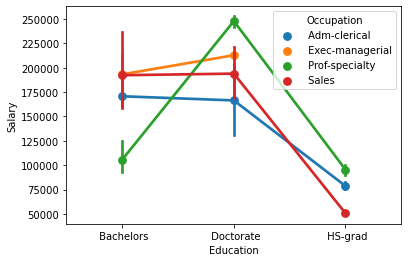

In [31]:
sns.pointplot(x='Education', y='Salary', data=m1, hue='Occupation')

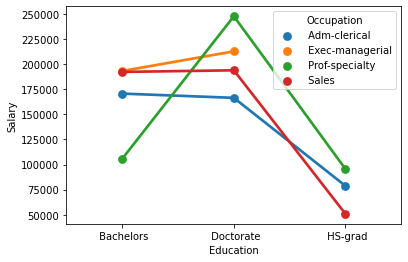

In [33]:
sns.pointplot(x='Education', y='Salary', data=m1, hue='Occupation', ci=None)

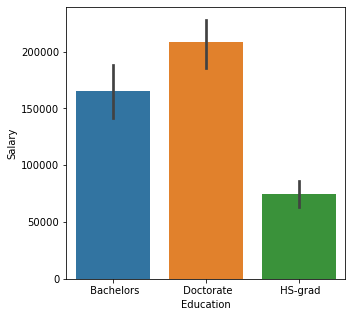

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
ax = sns.barplot(x="Education",y='Salary',data=m1)